<a href="https://colab.research.google.com/github/sunyingjian/AI-in-well-logging/blob/master/LSTM_simple_RNN_Bi_LSTM%E5%AE%9E%E7%8E%B0PE%E5%9B%9E%E5%BD%92_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sunyingjian/numpy-.git

Cloning into 'numpy-'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 415 (delta 3), reused 0 (delta 0), pack-reused 403
Receiving objects: 100% (415/415), 202.24 MiB | 34.58 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Checking out files: 100% (206/206), done.


In [2]:
! /opt/bin/nvidia-smi

Mon Feb  1 08:22:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
%matplotlib inline
import tensorflow_addons as tfa

In [4]:
tf.__version__

'2.4.1'

In [5]:
data = pd.read_csv('/content/numpy-/TCN data.csv')
data

,Unnamed: 0,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,Well Name,PE
0,0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0,1.000000,3,7,0.557385
1,1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0,0.978788,3,7,0.494046
2,2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0,0.956566,3,7,0.430707
3,3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0,0.935354,3,7,0.418039
4,4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0,0.914141,3,7,0.405371
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,3227,0.923077,0.996357,0.155858,0.646070,0.565833,0.129373,1,0.681818,5,0,0.432860
3228,3228,0.923077,0.997268,0.145818,0.650055,0.576589,0.144021,1,0.673737,5,0,0.398277
3229,3229,0.923077,0.998179,0.169829,0.657359,0.594401,0.144021,1,0.665657,5,0,0.378769
3230,3230,0.923077,0.999089,0.177978,0.658023,0.598516,0.138135,1,0.657576,5,0,0.373955


In [6]:
data['Well Name'].value_counts()

1    501
7    471
3    463
2    461
6    449
4    415
0    404
5     68
Name: Well Name, dtype: int64

# 分割数据集

In [7]:
test_data = data.loc[data['Well Name']==1]

In [8]:
test_data

,Unnamed: 0,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,Well Name,PE
1381,1381,0.076923,0.000000,0.489844,0.465117,0.682292,0.181401,0,1.000000,2,1,0.434634
1382,1382,0.076923,0.000911,0.369284,0.445682,0.776042,0.241224,0,0.986869,2,1,0.411705
1383,1383,0.076923,0.001821,0.414073,0.435586,0.830729,0.269206,0,0.973737,2,1,0.400811
1384,1384,0.076923,0.002732,0.352277,0.415863,0.911458,0.299118,0,0.960606,2,1,0.378389
1385,1385,0.076923,0.003643,0.336421,0.401467,0.872396,0.296223,0,0.946465,2,1,0.367241
...,...,...,...,...,...,...,...,...,...,...,...,...
1877,1877,0.923077,0.484517,0.180390,0.525660,0.419271,0.350258,1,0.064646,3,1,0.357487
1878,1878,0.923077,0.485428,0.129315,0.530370,0.546875,0.248943,1,0.049495,3,1,0.392450
1879,1879,0.923077,0.486339,0.098091,0.532214,0.598958,0.167892,1,0.034343,8,1,0.420699
1880,1880,0.923077,0.487250,0.110403,0.536914,0.648438,0.126402,1,0.019192,8,1,0.429440


In [9]:
test_data = test_data.drop(columns=['Unnamed: 0','Well Name'])

In [10]:
test_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,PE
1381,0.076923,0.000000,0.489844,0.465117,0.682292,0.181401,0,1.000000,2,0.434634
1382,0.076923,0.000911,0.369284,0.445682,0.776042,0.241224,0,0.986869,2,0.411705
1383,0.076923,0.001821,0.414073,0.435586,0.830729,0.269206,0,0.973737,2,0.400811
1384,0.076923,0.002732,0.352277,0.415863,0.911458,0.299118,0,0.960606,2,0.378389
1385,0.076923,0.003643,0.336421,0.401467,0.872396,0.296223,0,0.946465,2,0.367241
...,...,...,...,...,...,...,...,...,...,...
1877,0.923077,0.484517,0.180390,0.525660,0.419271,0.350258,1,0.064646,3,0.357487
1878,0.923077,0.485428,0.129315,0.530370,0.546875,0.248943,1,0.049495,3,0.392450
1879,0.923077,0.486339,0.098091,0.532214,0.598958,0.167892,1,0.034343,8,0.420699
1880,0.923077,0.487250,0.110403,0.536914,0.648438,0.126402,1,0.019192,8,0.429440


In [11]:
index=data[data['Well Name'].isin([1])].index[0]

In [12]:
index

1381

In [13]:
training_data = data.drop(index = [i for i in range(1381,1882)])

In [14]:
training_data

,Unnamed: 0,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,Well Name,PE
0,0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0,1.000000,3,7,0.557385
1,1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0,0.978788,3,7,0.494046
2,2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0,0.956566,3,7,0.430707
3,3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0,0.935354,3,7,0.418039
4,4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0,0.914141,3,7,0.405371
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,3227,0.923077,0.996357,0.155858,0.646070,0.565833,0.129373,1,0.681818,5,0,0.432860
3228,3228,0.923077,0.997268,0.145818,0.650055,0.576589,0.144021,1,0.673737,5,0,0.398277
3229,3229,0.923077,0.998179,0.169829,0.657359,0.594401,0.144021,1,0.665657,5,0,0.378769
3230,3230,0.923077,0.999089,0.177978,0.658023,0.598516,0.138135,1,0.657576,5,0,0.373955


In [15]:
train_data = training_data.drop(columns=['Well Name','Unnamed: 0'])

In [16]:
train_data

,Formation,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS,Facies,PE
0,0.076923,0.399818,0.298966,0.458149,0.776042,0.219321,0,1.000000,3,0.557385
1,0.076923,0.400729,0.302738,0.456157,0.888021,0.231865,0,0.978788,3,0.494046
2,0.076923,0.401639,0.306417,0.454165,0.903646,0.241224,0,0.956566,3,0.430707
3,0.076923,0.402550,0.339247,0.452173,0.880208,0.242479,0,0.935354,3,0.418039
4,0.076923,0.403461,0.285601,0.446860,0.869792,0.246049,0,0.914141,3,0.405371
...,...,...,...,...,...,...,...,...,...,...
3227,0.923077,0.996357,0.155858,0.646070,0.565833,0.129373,1,0.681818,5,0.432860
3228,0.923077,0.997268,0.145818,0.650055,0.576589,0.144021,1,0.673737,5,0.398277
3229,0.923077,0.998179,0.169829,0.657359,0.594401,0.144021,1,0.665657,5,0.378769
3230,0.923077,0.999089,0.177978,0.658023,0.598516,0.138135,1,0.657576,5,0.373955


# 切割步长

In [17]:
training_data = training_data.values

In [19]:
seq_length = 100
data_ = []
for i in range(len(train_data)-seq_length):
  if training_data[i,-2]!=training_data[i+seq_length,-2]:
    continue
  data_.append(train_data.iloc[i:i+seq_length])

In [20]:
data_ = np.array([df.values for df in data_])

In [21]:
data_.shape

(2063, 100, 10)

In [22]:
X = data_[:,:,:9]

In [23]:
X.shape

(2063, 100, 9)

In [24]:
Y = data_[:,:,-1]

In [25]:
Y.shape

(2063, 100)

In [26]:
data_test = []
for i in range(len(test_data)-seq_length):
    data_test.append(test_data.iloc[i:i+seq_length])

In [27]:
data_test = np.array([df.values for df in data_test])

In [28]:
data_test.shape

(401, 100, 10)

In [29]:
test_x = data_test[:,:,:9]

In [30]:
test_y = data_test[:,:,-1]

# 定量函数

In [31]:
import sklearn
from sklearn import metrics
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LSTM

In [32]:
input = tf.keras.Input(shape =(100,9))

In [33]:
x = tf.keras.layers.LSTM(64,return_sequences=True)(input)
x = tf.keras.layers.Dense(64,activation='relu',kernel_regularizer='l2')(x)
x = tf.keras.layers.Dense(1)(x)

In [34]:
model = tf.keras.Model(inputs = input,outputs = x)

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 9)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100, 64)           18944     
_________________________________________________________________
dense (Dense)                (None, 100, 64)           4160      
_________________________________________________________________
dense_1 (Dense)              (None, 100, 1)            65        
Total params: 23,169
Trainable params: 23,169
Non-trainable params: 0
_________________________________________________________________


In [36]:
#学习率衰减
learning_rate=0.01

Lr_change=tf.keras.callbacks.ReduceLROnPlateau('val_mae',patience = 20, factor = 0.5, min_lr=0.0001)
#保存准确率最好的模型
from keras.callbacks import ModelCheckpoint
filepath="best_weight.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True,mode='min')
Adam=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=Adam,loss='mse',metrics=['mae','mse'])

In [37]:
history=model.fit( X,Y,batch_size=128,
         epochs=100, 
         callbacks=[Lr_change,checkpoint],
         validation_data=(test_x,test_y))

Epoch 1/100
17/17 [==============================] - 9s 55ms/step - loss: 0.9747 - mae: 0.4790 - mse: 0.4017 - val_loss: 0.4233 - val_mae: 0.0855 - val_mse: 0.0139

Epoch 00001: val_mae improved from inf to 0.08548, saving model to best_weight.h5
Epoch 2/100
17/17 [==============================] - 0s 14ms/step - loss: 0.3820 - mae: 0.0888 - mse: 0.0127 - val_loss: 0.2688 - val_mae: 0.0693 - val_mse: 0.0076

Epoch 00002: val_mae improved from 0.08548 to 0.06927, saving model to best_weight.h5
Epoch 3/100
17/17 [==============================] - 0s 13ms/step - loss: 0.2421 - mae: 0.0672 - mse: 0.0077 - val_loss: 0.1709 - val_mae: 0.0568 - val_mse: 0.0060

Epoch 00003: val_mae improved from 0.06927 to 0.05679, saving model to best_weight.h5
Epoch 4/100
17/17 [==============================] - 0s 12ms/step - loss: 0.1557 - mae: 0.0627 - mse: 0.0069 - val_loss: 0.1123 - val_mae: 0.0513 - val_mse: 0.0052

Epoch 00004: val_mae improved from 0.05679 to 0.05135, saving model to best_weight.h5


In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse', 'lr'])

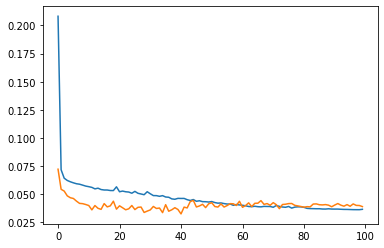

In [ ]:
plt.plot(history.epoch,history.history.get('mae'),label='mae')
plt.plot(history.epoch,history.history.get('val_mae'),label='val_mae')

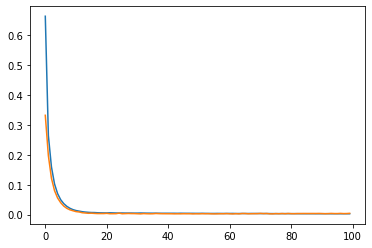

In [ ]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')

In [38]:
test_true_y = test_data['PE'].values

In [39]:
def help(model,test_x,test_true_y):
  y_pred = model.predict(test_x)
  y_pred1 = y_pred[1,:50,:]
  y_pred_2 = y_pred[:,50,:]
  y_pred_3 = y_pred[-1,50:,:]
  y_pred_true = np.append(y_pred1,y_pred_2)
  y_pred_true = np.append(y_pred_true,y_pred_3)
  print(f'MAE={metrics.mean_absolute_error(test_true_y,y_pred_true)}')
  print(f'可决系数R2:{r2_score(test_true_y,y_pred_true)}')

In [40]:
help(model,test_x,test_true_y)

MAE=0.044495593430076426
可决系数R2:0.428773764750247


#双向LSTM

In [41]:
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True))(input)
x = tf.keras.layers.Dense(64,activation='relu',kernel_regularizer='l2')(x)
x = tf.keras.layers.Dense(1)(x)

In [42]:
model2 = tf.keras.Model(inputs = input,outputs = x)

In [43]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 9)]          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 128)          37888     
_________________________________________________________________
dense_2 (Dense)              (None, 100, 64)           8256      
_________________________________________________________________
dense_3 (Dense)              (None, 100, 1)            65        
Total params: 46,209
Trainable params: 46,209
Non-trainable params: 0
_________________________________________________________________


In [44]:
#学习率衰减
learning_rate=0.01

Lr_change=tf.keras.callbacks.ReduceLROnPlateau('val_mae',patience = 20, factor = 0.5, min_lr=0.0001)
#保存准确率最好的模型
from keras.callbacks import ModelCheckpoint
filepath="best_weight.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True,mode='min')
Adam=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model2.compile(optimizer=Adam,loss='mse',metrics=['mae'])

In [45]:
history=model2.fit( X,Y,batch_size=128,
         epochs=100, 
         callbacks=[Lr_change,checkpoint],
         validation_data=(test_x,test_y))

Epoch 1/100
17/17 [==============================] - 3s 70ms/step - loss: 1.7534 - mae: 0.6679 - val_loss: 0.5274 - val_mae: 0.0977

Epoch 00001: val_mae improved from inf to 0.09771, saving model to best_weight.h5
Epoch 2/100
17/17 [==============================] - 0s 18ms/step - loss: 0.4791 - mae: 0.0792 - val_loss: 0.3509 - val_mae: 0.0510

Epoch 00002: val_mae improved from 0.09771 to 0.05100, saving model to best_weight.h5
Epoch 3/100
17/17 [==============================] - 0s 17ms/step - loss: 0.3215 - mae: 0.0673 - val_loss: 0.2374 - val_mae: 0.0585

Epoch 00003: val_mae did not improve from 0.05100
Epoch 4/100
17/17 [==============================] - 0s 16ms/step - loss: 0.2194 - mae: 0.0638 - val_loss: 0.1668 - val_mae: 0.0517

Epoch 00004: val_mae did not improve from 0.05100
Epoch 5/100
17/17 [==============================] - 0s 15ms/step - loss: 0.1568 - mae: 0.0633 - val_loss: 0.1223 - val_mae: 0.0487

Epoch 00005: val_mae improved from 0.05100 to 0.04870, saving model

In [46]:
help(model2,test_x,test_true_y)

MAE=0.03772090406205945
可决系数R2:0.6258629090865854


# simple RNN

In [47]:
x = tf.keras.layers.SimpleRNN(64,return_sequences=True)(input)
x = tf.keras.layers.Dense(64,activation='relu',kernel_regularizer='l2')(x)
x = tf.keras.layers.Dense(1)(x)

In [48]:
model3 = tf.keras.Model(inputs = input,outputs = x)

In [49]:
#学习率衰减
learning_rate=0.01

Lr_change=tf.keras.callbacks.ReduceLROnPlateau('val_mae',patience = 20, factor = 0.5, min_lr=0.0001)
#保存准确率最好的模型
from keras.callbacks import ModelCheckpoint
filepath="best_weight.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True,mode='min')
Adam=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model3.compile(optimizer=Adam,loss='mse',metrics=['mae'])

In [50]:
history = model.fit(X,Y,batch_size=128,
                    callbacks=[Lr_change,checkpoint],epochs=100,
                    validation_data=(test_x,test_y))

Epoch 1/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0022 - mae: 0.0322 - mse: 0.0020 - val_loss: 0.0047 - val_mae: 0.0463 - val_mse: 0.0045

Epoch 00001: val_mae improved from inf to 0.04627, saving model to best_weight.h5
Epoch 2/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0021 - mae: 0.0320 - mse: 0.0020 - val_loss: 0.0046 - val_mae: 0.0449 - val_mse: 0.0044

Epoch 00002: val_mae improved from 0.04627 to 0.04485, saving model to best_weight.h5
Epoch 3/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0021 - mae: 0.0319 - mse: 0.0020 - val_loss: 0.0047 - val_mae: 0.0453 - val_mse: 0.0045

Epoch 00003: val_mae did not improve from 0.04485
Epoch 4/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0021 - mae: 0.0318 - mse: 0.0020 - val_loss: 0.0045 - val_mae: 0.0446 - val_mse: 0.0043

Epoch 00004: val_mae improved from 0.04485 to 0.04460, saving model to best_weight.h5
Epoch 5/100
17/17 [=================

In [51]:
help(model3,test_x,test_true_y)

MAE=0.9731696362186457
可决系数R2:-142.56246343244626
